<a href="https://colab.research.google.com/github/hitsaikateie/Capstone-project-Regression/blob/main/Yes_Bank_Stock_closing_price_prediction_ML_Submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **Yes Bank Stock closing price prediction**


##### **Project Type**    - Machine Learning Regression
##### **Contribution**    - Individual
##### **Name -** Ashwin Pawar


# **Project Summary -**

Yes Bank is an wellknown bank in India which provides wide range of services and solutions right from bank accounts, deposits, cards, cash management, privilege banking, trade finance, Non-Resident India (NRI) banking, institutional banking, merchant acquiring, digital banking and agricultural banking solutions. As the data is all about the stock price.So, **In this project I will be analyzing the patterns of the dataset by performing exploratory data analysis and try to build a model with the help of machine learning for predicting the closing stock price.**

The tools for data analysis and model building used in this project are the packages from Python library such as Numpy and Pandas, Matplotlib , Seaborn, Linear Regression, lasso,ridge, ElasticNet,Minmaxscaler etc.



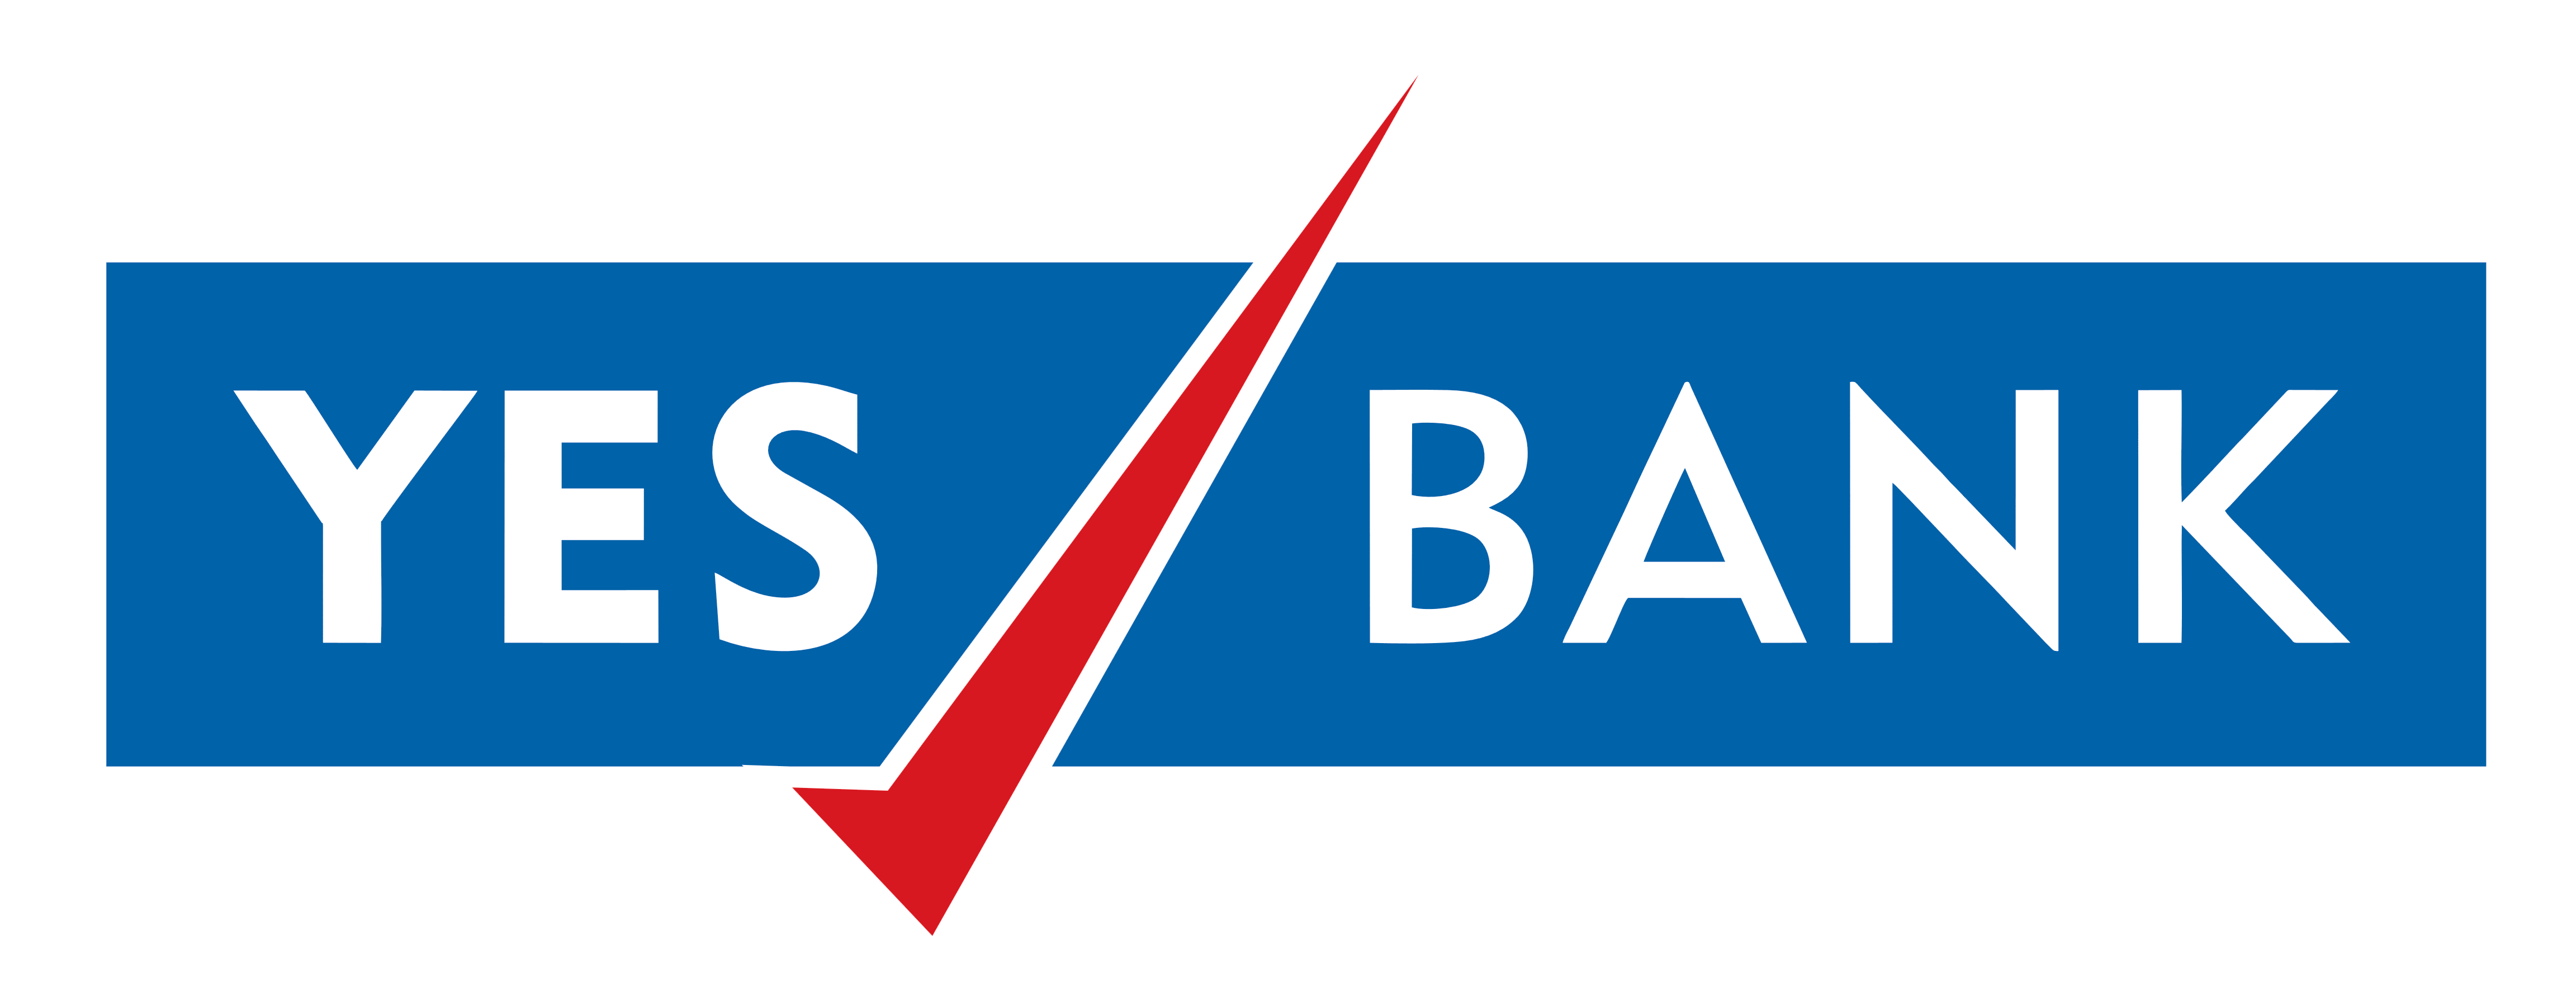

# **GitHub Link -**

https://github.com/pawarashwin/Data-Science_Projects/tree/main/ML_Project

# **Problem Statement**


The given data set contains stock price information in the various columns by monthly date. There are 5 columns in the data set such as date, open, high, low, closing price. our target variable here is the closing price column which we will try to predict for future. So first we will perform some exploratory data analysis to tha data, try to find out some patterns as well as see the relations between the various columns and the target variable column. Then we will be building a model through which we will be able to predict or provide a decent estimate of the closing price which is our target variable.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
from numpy import math
from datetime import datetime

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import (Lasso, Ridge, ElasticNet)
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import (mean_squared_error, mean_absolute_percentage_error, mean_absolute_error)
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive/')

### Dataset First View

In [ ]:
# Dataset First Look
path=('/content/drive/MyDrive/cap_project/ML capston project/data_YesBank_StockPrices.csv')
YB_df=pd.read_csv(path)

In [ ]:
YB_df

In [ ]:
YB_df.sample(5)

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
YB_df.shape

In [ ]:
number_of_rows=YB_df.shape[0]

In [ ]:
number_of_rows

In [ ]:
number_of_columns=YB_df.shape[1]

In [ ]:
number_of_columns

### Dataset Information

In [ ]:
# Dataset Info
YB_df.info()

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
YB_df.duplicated().sum()

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
YB_df.isnull().sum().sum()

In [ ]:
# Visualizing the missing values

**There are no missing values in the data set**

### What did you know about your dataset?

Out dataset contains 185 rows and 5 columns with diffrent varriable types. There are no missing values as well as duplicate values in the dataset. There are 2 type of information inside the columns as float and object. Basically the given dataset is providing us the overview of the stock price details information and by generating the insight from those we will try to see the relations between our target variable(Closing price) and the independent variables that are the other 4 columns. Then we will try to predict or provide the estimates of the future closing price by building machine learning algorithm models.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
YB_df.columns

In [ ]:
# Dataset Describe
YB_df.describe()

### Variables Description

The name of the individual varriables mentioned in the columns of the data set and the descriptions of them are listed below:

⦁ Date: Month and day information on which the information was recorded.(Categorical)

⦁ Open : Opening stock price.(Numeric)

⦁ High : Highest Stock price.(Numeric)

⦁ Low : Lowest Stock Price.(Numeric)

⦁ Close : Closing Stock Price.(Numeric)


### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for items in YB_df.columns.tolist():
  print('The number of uniques values in column',items,'is', YB_df[items].nunique())

In [ ]:
YB_df['High'].unique()

In [ ]:
YB_df['Open'].unique()

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
YBC_df = YB_df.copy()

In [ ]:
YBC_df.head()

In [ ]:
# Write your code to make your dataset analysis ready.
YBC_df['Date']= pd.to_datetime(YBC_df['Date'].apply(lambda x:datetime.strptime(x, '%b-%y')))

In [ ]:
YBC_df.head()

### What all manipulations have you done and insights you found?

The given data set does not have any missing values or null values. Also there are no duplicate values in the data set as I have checked already. Since the 'Date' column was not arranged in a proper format, I have changed the 'Date' column in to the format Year-month-date that will be hepfull to visualize the data.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

#### **Univariate Analysis**

In [ ]:
# Chart - 1 visualization code
# Dependent variable 'Price'
plt.figure(figsize=(15,10))
sns.distplot(YBC_df['Close'],color="y")

##### 1. Why did you pick the specific chart?

To see the distribution of Closing price in the dataset I have used the dist plot as with the help of dist plot I will be able to check the skewness of the data and according to that data will be transformed to handle the skewness.

##### 2. What is/are the insight(s) found from the chart?

The above chart shows that the 'Close' columnm data is possitively skewed. So I have to transform this column data to log scale data for handling the skewness.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes the gain insight shows the posstive skewed distribution of the 'Close' column that will help me to understand and the methods to be applied to tackle the skewness of the data.

#### Chart - 2

In [ ]:
numeric_features = YBC_df.describe().columns

In [ ]:
numeric_features

In [ ]:
# Chart - 2 visualization code

In [ ]:
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = YBC_df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='Red', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='magenta', linestyle='dashed', linewidth=2)
    ax.set_title(col)
plt.show()

##### 1. Why did you pick the specific chart?

As histogram is a very popular tool so the chart will show the overview of each and every varriables information and gives a clear idea about the data set. It also sumarizes the measured data.

##### 2. What is/are the insight(s) found from the chart?

From the above charts it can be clearly seen that all the numeric variables are possitively skewed. So I have to transform these column datas to log scale data for handling the skewness.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes the gain insight shows the posstive skewed distribution of all the numeric columns that will help me to understand and the methods to be applied to tackle the skewness of the data.

#### Chart - 3

In [ ]:
# Chart - 3 visualization code
fig = plt.figure(figsize=(10, 6))
ax = fig.gca()
feature = YBC_df['Date']
feature.hist(bins=50, ax = ax)
ax.axvline(feature.mean(), color='Red', linestyle='dashed', linewidth=2)
ax.axvline(feature.median(), color='magenta', linestyle='dashed', linewidth=2)
plt.show()

##### 1. Why did you pick the specific chart?

To see the distribution of 'Date' column which is a categorical in the dataset I have used the dist plot .

##### 2. What is/are the insight(s) found from the chart?

As the Date column is categorical information and from the distogram plot it is clear that the date column is equally distributed.

#### Chart - 4

**Bivariate Analysis**

In [ ]:
# Chart - 4 visualization code
ax=px.line(YBC_df,YBC_df['Date'],YBC_df['Close'],title='Monthly Closing Price')
ax.update_layout(xaxis=dict(title='year'),yaxis=dict(title='Closing Price'))
ax.show()

##### 1. Why did you pick the specific chart?

As I am doing bivariate analysis. Therefore the above line plot shows the relationship between the 'Date' column and the closing price.

##### 2. What is/are the insight(s) found from the chart?

From the above chart it can be seen that there was consistant overall growth in the stock price till 2014 afcourse with some downfalls. But after 2014 the stock price started raise high and from 2016 through 2018 the growth was very impressive some times the stock price raised to over 350. But in the year of 2020 there was heavy downfall in the stock prices. The reason must be the fraud case for which one of the founder of the bank was arrested which is known to all.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes the gained insight is showing the overall trends of the stock price throughout the year. By just seeing the trend we can have an idea as when to invest for buying yes bank shares.

#### Chart - 5

In [ ]:
# Chart - 5 visualization code
fig = plt.figure(figsize=(9, 6))
ax = fig.gca()
feature = YBC_df['Open']
label = YBC_df['Close']
correlation = feature.corr(label)
plt.scatter(x=feature, y=label)
plt.xlabel('Open')
plt.ylabel('Close')
ax.set_title('Close vs ' + 'Open' + '- correlation: ' + str(correlation))
z = np.polyfit(YBC_df['Open'], YBC_df['Close'], 1)
y_hat = np.poly1d(z)(YBC_df['Open'])

plt.plot(YBC_df['Open'], y_hat, "r--", lw=1)

plt.show()

##### 1. Why did you pick the specific chart?

The above scatter plot shows the relation between the Open and Close.

##### 2. What is/are the insight(s) found from the chart?

As we can see that the Open and Close data are Highly correlated therefore we can say that the closing price is very much dependant upon the Opening price of the stock

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. The high correlation between the Open and Price indicates that Opening price will alway plays an important role to have an idea about closing price.

#### Chart - 6

In [ ]:
# Chart - 6 visualization code
fig = plt.figure(figsize=(9, 6))
ax = fig.gca()
feature = YBC_df['High']
label = YBC_df['Close']
correlation = feature.corr(label)
plt.scatter(x=feature, y=label)
plt.xlabel('High')
plt.ylabel('Close')
ax.set_title('Close vs ' + 'High' + '- correlation: ' + str(correlation))
z = np.polyfit(YBC_df['High'], YBC_df['Close'], 1)
y_hat = np.poly1d(z)(YBC_df['High'])

plt.plot(YBC_df['High'], y_hat, "r--", lw=1)

plt.show()

##### 1. Why did you pick the specific chart?

The above scatter plot shows the relation between the High and Close.

##### 2. What is/are the insight(s) found from the chart?

As we can see that the High and Close data are Highly correlated therefore we can say that the closing price is also very much dependant on the High price of the stock.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. The high correlation between the High and Price indicates that High price will always play an important role to have an idea about closing price.

#### Chart - 7

In [ ]:
# Chart - 7 visualization code
fig = plt.figure(figsize=(9, 6))
ax = fig.gca()
feature = YBC_df['Low']
label = YBC_df['Close']
correlation = feature.corr(label)
plt.scatter(x=feature, y=label)
plt.xlabel('Low')
plt.ylabel('Close')
ax.set_title('Close vs ' + 'Low' + '- correlation: ' + str(correlation))
z = np.polyfit(YBC_df['Low'], YBC_df['Close'], 1)
y_hat = np.poly1d(z)(YBC_df['Low'])

plt.plot(YBC_df['Low'], y_hat, "r--", lw=1)

plt.show()

##### 1. Why did you pick the specific chart?

The above scatter plot shows the relation between the Low and Close.

##### 2. What is/are the insight(s) found from the chart?

Also we can see that the Low and Close data are also Highly correlated therefore we can say that the closing price is also very much dependant on the Low price of the stock.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. The high correlation between the Low and Price indicates that Low price will also play an important role to have an idea about closing price.

#### Chart - 8 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code
plt.figure(figsize=(7,3))
sns.heatmap(YBC_df.corr(),annot=True,cmap='coolwarm')

##### 1. Why did you pick the specific chart?

Correlation heatmaps are a type of plot that visualize the strength of relationships between numerical variables. Correlation plots are used to understand which variables are related to each other and the strength of this relationship. A correlation plot typically contains a number of numerical variables, with each variable represented by a column. The rows represent the relationship between each pair of variables. The values in the cells indicate the strength of the relationship, with positive values indicating a positive relationship and negative values indicating a negative relationship.

Therefore, to show the relations between the varriables we have used this plot.

##### 2. What is/are the insight(s) found from the chart?

From the above chart we can se that each and every feature here is highly correlated to each other. As the linear Regression assumes that there is no multicolinearity therefore we will try to reduce the multicolinearity using transformation of variables and generating new features.

#### Chart - 9 - Pair Plot

In [ ]:
# Pair Plot visualization code
sns.pairplot(YBC_df,hue="Close")

##### 1. Why did you pick the specific chart?

Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters.The Pairplot visualizes given data to find the relationship between them where the variables can be continuous or categorical.

##### 2. What is/are the insight(s) found from the chart?

As I have used Close in the hue variable so the above plot will show the distribution of Close with the different type of columns.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

Threr are no missing values and null values in the dataset

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments
fig=px.box(YBC_df['Open'])
fig.update_layout(xaxis=dict(title='Boxplot'))
fig.show()

In [ ]:
fig=px.box(np.log10(YBC_df['Open']),title='applied log10')
fig.update_layout(xaxis=dict(title='Boxplot'))
fig.show()

In [ ]:
fig=px.box(YBC_df['High'])
fig.update_layout(xaxis=dict(title='Boxplot'))
fig.show()

In [ ]:
fig=px.box(np.log10(YBC_df['High']),title='applied log10')
fig.update_layout(xaxis=dict(title='Boxplot'))
fig.show()

In [ ]:
fig=px.box(YBC_df['Low'])
fig.update_layout(xaxis=dict(title='Boxplot'))
fig.show()

In [ ]:
fig=px.box(np.log10(YBC_df['High']),title='applied log10')
fig.update_layout(xaxis=dict(title='Boxplot'))
fig.show()

In [ ]:
# Dependent variable 'Price'
plt.figure(figsize=(15,10))
sns.distplot(np.log10(YBC_df['Close']),color="y")

In [ ]:
YBC_df.set_index('Date' , inplace=True)

In [ ]:
#Generating a new feature to tackle the high multicolinearity.
YBC_df['average'] = YBC_df[['Open', 'High', 'Low']].mean(axis=1).round(2)

In [ ]:
YBC_df.head(10)

In [ ]:
dependant_variable='Close'

In [ ]:
Independant_variable=list(set(YBC_df.columns.tolist())-{dependant_variable})

In [ ]:
x= np.log10(YBC_df[Independant_variable]).values

In [ ]:
y=np.log10(YBC_df[dependant_variable]).values

##### What all outlier treatment techniques have you used and why did you use those techniques?

There were 3 independent features that had outliers shown in the above box plot. So to handle the outliers as well as to tackle the skewness of the datas I have transformed all the numeric features to log base 10 values.

After the conversion of numeric features I also have visualized them through the box plot that shows no outliers also the price column information can be seen as an approx normal distribution.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
calc_vif(YBC_df[[i for i in YBC_df.describe().columns]])

### 5. Data Transformation

In [ ]:
# Transform Your data
x= np.log10(YBC_df[Independant_variable]).values
y=np.log10(YBC_df[dependant_variable]).values

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

Yes, The datas are needed to be transformed. It has been already seen that all the independent variables and target variables are possitive skewed and they also have outliers. so to tackle both the problem I have used log10 transformation.

**6. Data Splitting**

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)


##### What data splitting ratio have you used and why?

Here I have used the most common or standard spliting of the dataset which is 80/20. 80% of the dataset is to train the algorithm and 20% is for test.

### 6. Data Scaling

In [ ]:
# Scaling your data
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

##### Which method have you used to scale you data and why?

Here I have used minmaxscaler method to scale the data since all the independent variables are not normally distributed. so to make sure every independent variables contribute almost equally to the analysis the minmaxscaler method is used.

## ***7. ML Model Implementation***

### ML Model - 1
**Linear Regression**

In [ ]:
# ML Model - 1 Implementation
regressor = LinearRegression()

# Fit the Algorithm
regressor.fit(x_train, y_train)

In [ ]:
regressor.intercept_

In [ ]:
regressor.coef_

In [ ]:
y_pred_train = regressor.predict(x_train)
#predicting the test results
y_pred = regressor.predict(x_test)

In [ ]:
y_train

In [ ]:
#predicted closing price on the test data set
y_pred

In [ ]:
# now we will visualize the comparison between actual values and predicted values of the target variable.
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred))
plt.plot(np.array(10**(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
# check for Homoscadacity
fig=px.scatter(x=10**(y_test),y=10**(y_pred), labels= {'x': 'Actual_value', 'y':'prediction'})
fig.add_shape(type='line', line=dict(dash='dash'),x0=y.min(),y0=y.min(),x1=y.max(),y1=y.max())
fig.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
Lr_MSE=mean_squared_error(10**(y_test), 10**(y_pred))
Lr_MSE

In [ ]:
mse_train=mean_squared_error(10**(y_train), 10**(y_pred_train))

In [ ]:
mse_train

In [ ]:
# Train performance
rmse_train=np.sqrt(mse_train)

In [ ]:
rmse_train

In [ ]:
# Test performance
Lr_RMSE = np.sqrt(Lr_MSE)
Lr_RMSE

In [ ]:
Lr_MAE=mean_absolute_error(10**(y_test), 10**(y_pred))

In [ ]:
Lr_MAE

In [ ]:
mean_absolute_percentage_error(10**(y_train), 10**(y_pred_train))

In [ ]:
Lr_MAPE=mean_absolute_percentage_error(10**(y_test), 10**(y_pred))
Lr_MAPE

In [ ]:
r2_score(y_train, y_pred_train)

In [ ]:
#Test performance
Lr_R2_score=r2_score(y_test, y_pred)
Lr_R2_score

In [ ]:
Matrics_score=pd.DataFrame({'mean squared error':[Lr_MSE],'root mean squared error':[Lr_RMSE],'mean absolute error':[Lr_MAE], 'mean absolute percentage error':[Lr_MAPE], 'r2_score':[Lr_R2_score],})

In [ ]:
Matrics_score

In [ ]:
# function to plot model performance
def plotModelResults(model, X_train=x_train, X_test=x_test, plot_intervals=False):

    #Plots modelled vs fact values


    prediction = model.predict(x_test)

    plt.figure(figsize=(10, 5))
    plt.plot(prediction, "g", label="prediction", linewidth=2.0)
    plt.plot(y_test, label="actual", linewidth=2.0)


    plt.title("Mean absolute percentage error {0:.2f}".format(Lr_MAPE))
    plt.legend(loc="best")
    plt.tight_layout()
    plt.grid(True);

plotModelResults(regressor, plot_intervals=True)

### ML Model - 2
**Ridge Regression with cross validation**

In [ ]:
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(x_train,y_train)

In [ ]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

In [ ]:
y_pred_ridge = ridge_regressor.predict(x_test)

In [ ]:
y_pred_ridge

In [ ]:
y_test

In [ ]:
#now we will visualize the comparison between actual values and predicted values of the target variable.
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_ridge))
plt.plot(10**(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
R_MSE  = mean_squared_error(10**(y_test), 10**(y_pred_ridge))
print("MSE :" , R_MSE)


In [ ]:
R_RMSE = np.sqrt(R_MSE)
print("RMSE :" ,R_RMSE)

In [ ]:
R_r2 = r2_score(10**(y_test), 10**(y_pred_ridge))
R_r2

In [ ]:
R_MAE=mean_absolute_error(10**(y_test), 10**(y_pred_ridge))
R_MAE

In [ ]:
R_MAPE=mean_absolute_percentage_error(10**(y_test), 10**(y_pred_ridge))
R_MAPE

In [ ]:
# Visualizing evaluation Metric Score chart
Matrics_score_ridge=pd.DataFrame({'mean squared error':[R_MSE],'root mean squared error':[R_RMSE],'mean absolute error':[R_MAE], 'mean absolute percentage error':[R_MAPE], 'r2_score':[R_r2],})

In [ ]:
Matrics_score_ridge

In [ ]:
# function to plot model performance
def plotModelResults(model, X_train=x_train, X_test=x_test, plot_intervals=False):

    #Plots modelled vs fact values


    prediction = model.predict(x_test)

    plt.figure(figsize=(10, 5))
    plt.plot(prediction, "g", label="prediction", linewidth=2.0)
    plt.plot(y_test, label="actual", linewidth=2.0)


    plt.title("Mean absolute percentage error {0:.2f}".format(R_MAPE))
    plt.legend(loc="best")
    plt.tight_layout()
    plt.grid(True);

plotModelResults(ridge_regressor, plot_intervals=True)

In [ ]:
# check for Homoscadacity
fig=px.scatter(x=10**(y_test),y=10**(y_pred_ridge), labels= {'x': 'Actual_value', 'y':'prediction'})
fig.add_shape(type='line', line=dict(dash='dash'),x0=y.min(),y0=y.min(),x1=y.max(),y1=y.max())
fig.show()

### ML Model - 3
**lASSO Regression with cross validation**

In [ ]:
lasso  = Lasso(alpha=0.1 , max_iter= 3000)

lasso.fit(x_train, y_train)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
lasso.score(x_train, y_train)

In [ ]:
y_pred_l = lasso.predict(x_test)

In [ ]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_l))
print("MSE :" , MSE)

MAE=mean_absolute_error(10**(y_test), 10**(y_pred_l))
print("MAE :" ,MAE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MAPE=mean_absolute_percentage_error(10**(y_test), 10**(y_pred_l))
print("MAPE :" ,MAPE)

r2 = r2_score(10**(y_test), 10**(y_pred_l))
print("R2 :" ,r2)

In [ ]:
# function to plot model performance
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_l))
plt.plot(10**(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=3)
lasso_regressor.fit(x_train, y_train)

In [ ]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

In [ ]:
y_pred_lasso = lasso_regressor.predict(x_test)

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_lasso))
plt.plot(10**(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
L_MSE  = mean_squared_error(10**(y_test), 10**(y_pred_lasso))
print("MSE :" , L_MSE)

L_MAE=mean_absolute_error(10**(y_test), 10**(y_pred_lasso))
print("MAE :" ,L_MAE)

L_RMSE = np.sqrt(L_MSE)
print("RMSE :" ,L_RMSE)

L_MAPE=mean_absolute_percentage_error(10**(y_test), 10**(y_pred_lasso))
print("MAPE :" ,L_MAPE)

L_r2 = r2_score(10**(y_test), 10**(y_pred_lasso))
print("R2 :" ,L_r2)

In [ ]:
# Visualizing evaluation Metric Score chart
Matrics_score_lasso=pd.DataFrame({'mean squared error':[L_MSE],'root mean squared error':[L_RMSE],'mean absolute error':[L_MAE], 'mean absolute percentage error':[L_MAPE], 'r2_score':[L_r2]})

In [ ]:
Matrics_score_lasso

In [ ]:
# check for Homoscadacity
fig=px.scatter(x=10**(y_test),y=10**(y_pred_lasso), labels= {'x': 'Actual_value', 'y':'prediction'})
fig.add_shape(type='line', line=dict(dash='dash'),x0=y.min(),y0=y.min(),x1=y.max(),y1=y.max())
fig.show()

In [ ]:
#checking the performance of the model
def plotModelResults(model, X_train=x_train, X_test=x_test, plot_intervals=False):

    #Plots modelled vs fact values


    prediction = model.predict(x_test)

    plt.figure(figsize=(10, 5))
    plt.plot(prediction, "g", label="prediction", linewidth=2.0)
    plt.plot(y_test, label="actual", linewidth=2.0)


    plt.title("Mean absolute percentage error {0:.2f}".format(L_MAPE))
    plt.legend(loc="best")
    plt.tight_layout()
    plt.grid(True);

plotModelResults(lasso_regressor, plot_intervals=True)

**ML Model 4**

**ElasticNet Regression with cross validation**

In [ ]:
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [ ]:
elasticnet.fit(x_train,y_train)

In [ ]:
elasticnet.score(x_train, y_train)

In [ ]:
y_pred_en = elasticnet.predict(x_test)

In [ ]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_en))
print("MSE :" , MSE)

MAE=mean_absolute_error(10**(y_test), 10**(y_pred_en))
print("MAE :" ,MAE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MAPE=mean_absolute_percentage_error(10**(y_test), 10**(y_pred_en))
print("MAPE :" ,MAPE)

r2 = r2_score(10**(y_test), 10**(y_pred_en))
print("R2 :" ,r2)

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_en))
plt.plot(10**(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)
elastic_regressor.fit(x_train, y_train)

In [ ]:
y_pred_elastic = elastic_regressor.predict(x_test)

In [ ]:
print("The best fit alpha value is found out to be :" ,elastic_regressor.best_params_)
print("\nUsing ",elastic_regressor.best_params_, " the negative mean squared error is: ", elastic_regressor.best_score_)

In [ ]:
E_MSE  = mean_squared_error(10**(y_test), 10**(y_pred_elastic))
print("MSE :" , E_MSE)

E_MAE=mean_absolute_error(10**(y_test), 10**(y_pred_elastic))
print("MAE :" ,MAE)

E_RMSE = np.sqrt(E_MSE)
print("RMSE :" ,E_RMSE)

E_MAPE=mean_absolute_percentage_error(10**(y_test), 10**(y_pred_elastic))
print("MAPE :" ,E_MAPE)

E_r2 = r2_score(10**(y_test), 10**(y_pred_elastic))
print("R2 :" ,E_r2)

In [ ]:
# Visualizing evaluation Metric Score chart
Matrics_score_elastic=pd.DataFrame({'mean squared error':[E_MSE],'root mean squared error':[E_RMSE],'mean absolute error':[E_MAE], 'mean absolute percentage error':[E_MAPE], 'r2_score':[E_r2]})

In [ ]:
Matrics_score_elastic

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_elastic))
plt.plot(10**(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
# check for Homoscadacity
fig=px.scatter(x=10**(y_test),y=10**(y_pred_elastic), labels= {'x': 'Actual_value', 'y':'prediction'})
fig.add_shape(type='line', line=dict(dash='dash'),x0=y.min(),y0=y.min(),x1=y.max(),y1=y.max())
fig.show()

In [ ]:
#checking the performance of the model
def plotModelResults(model, X_train=x_train, X_test=x_test, plot_intervals=False):

    #Plots modelled vs fact values


    prediction = model.predict(x_test)

    plt.figure(figsize=(10, 5))
    plt.plot(prediction, "g", label="prediction", linewidth=2.0)
    plt.plot(y_test, label="actual", linewidth=2.0)


    plt.title("Mean absolute percentage error {0:.2f}".format(E_MAPE))
    plt.legend(loc="best")
    plt.tight_layout()
    plt.grid(True);

plotModelResults(elastic_regressor, plot_intervals=True)

**Evaluation metric Summary**

In [ ]:
model_report = pd.DataFrame(data={'model':['linear regression','ridge regression','lasso regression','elastic net regression'], 'mae':[Lr_MAE,R_MAE,L_MAE,E_MAE], 'mse':[Lr_MSE,R_MSE,L_MSE,E_MSE],'rmse':[Lr_RMSE,R_RMSE,L_RMSE,E_RMSE],'r2_score':[Lr_R2_score,L_r2,R_r2,E_r2],'mape':[Lr_MAPE,R_MAPE,L_MAPE,E_MAPE]})
model_report

**ML Model 5**

**Randomforest Regression**

In [ ]:
Regressor = RandomForestRegressor()
grid_values = {'n_estimators':[100, 150,  200], 'max_depth':[20,30, 50, 100]}
Regressor = GridSearchCV(Regressor, param_grid = grid_values, scoring = 'roc_auc', cv=5)

# Fit the object to train dataset
Regressor.fit(x_train, y_train)

In [ ]:
print(f'Best parameters: {Regressor.best_params_}')


In [ ]:
train_preds =  Regressor.predict(x_train)
test_preds  = Regressor.predict(x_test)

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(test_preds)
plt.plot(y_test)
plt.legend(["Predicted","Actual"])
plt.show()

##### Which hyperparameter optimization technique have you used and why?

Here for all the models I have used grid search cross validation technique since I have already the hyper parameter numbers and also the search space that is the data set is very small. so as per my understanding grid search cv woould be the best choioce to tune the hyper parameter.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes After using grid search cv for each model the performance is improved. for example for lasso regression one of the evaluation matrix the mean absolute percentage error before cross validation is MAPE : 0.7547254629560559 but after using cross validation the same mevaluation matrix for the test data became MAPE : 0.04091633443973601. Therefore, it can be established that after using crossvalidation the the performance was improved. That can be visualized also in the above plots.

### Which Evaluation metrics did you consider for a positive business impact and why?

Since this problem is related to regression so I would choose the root mean square error evaluation metrics for possitive business impact. The root mean square error not only measures the difference between the actual and predicted values it also indicates the effect of large errors.

### Which ML model did you choose from the above created models as your final prediction model and why?

From all the above models for lasso and elasticnet regressions the evaluation matricses for test data set are almost close to each other. So as per my understanding we can use elasticnet regressor for now. However it will be very early to pick a model at this point of time since the dataset is very small as we need more data so that the algorithms get more training data to learn more and improve their accuracy.

# **Conclusion**

* The data set does not have any null values/missing values as well as duplicate values which made the analysis easy and smooth.
*   I started with univariate analysis in which it can be seen that all the variables were possitively skewed.
*   In the section of bivariate analysis it can be seen that all the independent variables are having linear relationship with the depoendent variable.
*   While analysing the close price with date it can be seen that there was huge fall in the stock prices after year 2018.
*   In the correlation heatmap chart it can be clearly seen that all the variables are highly corelated to each other which is a problem for linear regression.
*   In the box plot section It can be seen that the independent variables are having some outliers.
*   Also the date column was formated to year-month-date format.
*   To tackle the outliers,skewness and multicolinearity problem the data was tranformed to log10 value and a new feature as average which is the mean of the prices for each row was generated.
*   At last I have tried to implement 5 models in order to predict the closing stock prices and finally found that elastic net regression model is the best performing model since it has better R2 score value as well as other evaluation matrics values.














### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***